# 분류

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisiomTree생성
dt_clf = DecisionTreeClassifier(random_state=156)
#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz
#export_graphviz의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,feature_names=iris_data.feature_names, impurity=True, filled=True)

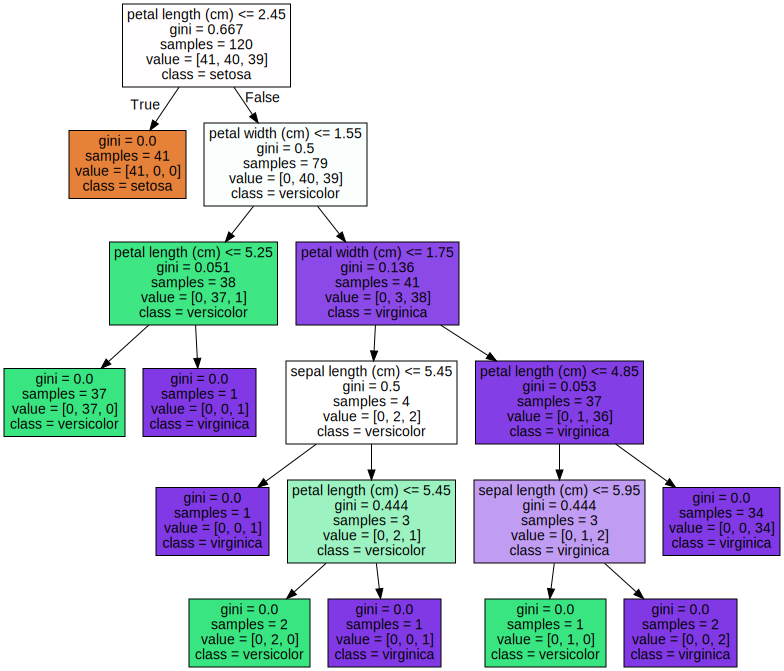

In [3]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 피처별 중요도 dt_clf.feature_importance_

Feature importance:
[0.02500521 0.         0.55490281 0.42009198]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


<AxesSubplot: >

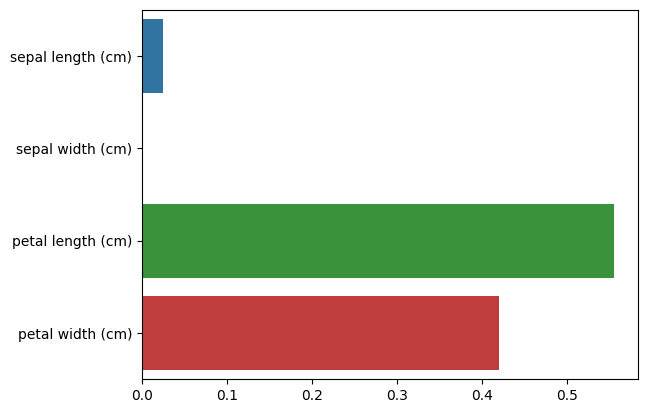

In [4]:
import seaborn as sns
import numpy as np

#features importance 추출
print('Feature importance:\n{0}'.format(dt_clf.feature_importances_,3))

#feature 별 importance 매필
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

#feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

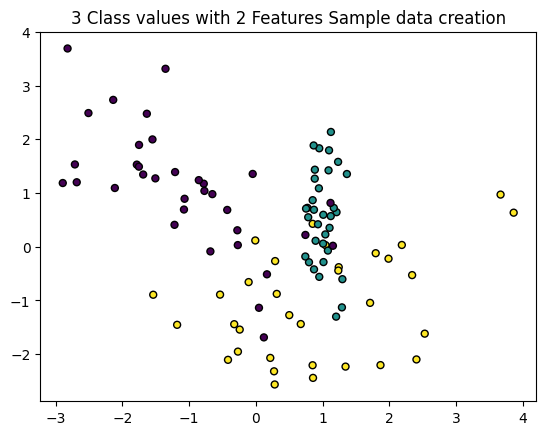

In [6]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creation")
X_feature, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_feature[:,0], X_feature[:,1],marker='o',c=y_labels, s=25, edgecolors='k')

In [7]:
#min_samples_leaf=6으로 설정해 최소 리프 개수 6
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_feature, y_labels)